# Feature Transformation*****

## Feature Scaling
**Definition : A technique to standardize the independent features present in the data in a fixed range.**

**Note: use feature scaling just before model building.**

### Normalization
**Definition : A technique often applied as a part of data preparation for Machine Learning. The goal of normalization is to change the values of numeric columns in the dataset to use common scale, without distorting differences in the range of values or loosing information.**

**Types :**
1. MinMax Scaling(most popular, sometimes it is only called normalization)
2. Mean Normalization
3. Max absolute scaling
4. Robust Scaling

**MinMax Scaler : x_new=(x_old-x_min)/(x_max-x_min), range in [0,1], class-->MinMaxScaler**

Geometrical intuition : data is set between range(depends on type of Normalization) and squeezed/expanded depends on data size, in unit square/rectangle(for 2D) and so on.

**Mean Normalization : x_new=(x_old-x_mean)/(x_max-x_min), range in [-1,1]**

Here we are doing mean centering as we use to do in Standardization(so, this technique is used very rerely, instead we use Standardization). There is no separate class for this technique in Scikit-learn library, we have to code it manually.


**Max absolute scaling: x_new=(x_old)/|x_max|, class-->MaxAbsScaler**

Mostly used when we have sparse data(means, data having many zeros)

**Robust Scaling : x_new=(x_old-x_median)/IQR, class-->RobustScaler**

This scaling is Robust to outliers(generally it performs well with outliers)

### Topics Covered:
1. How to Normalize(MinMaxScaler)
2. Effect of Normalization on outliers
3. Normalization Vs Standardization

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df1 = pd.read_csv('wine_data.csv')
#first 5 rows
df1.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
#we will use only first 3 columns in this session
df1 = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
#name features
df1.columns=['Class label', 'Alcohol', 'Malic acid']
#first 5 rows
df1.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


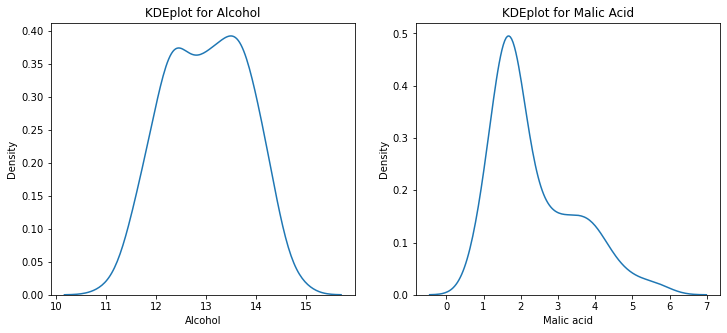

In [4]:
#Kernal Density Estimator graphs(kdeplot) for 'Alcohol' and 'Malic acid'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(df1['Alcohol'], ax=ax1)
ax1.set_title("KDEplot for Alcohol")

sns.kdeplot(df1['Malic acid'], ax=ax2)
ax2.set_title("KDEplot for Malic Acid")        

plt.show()

C:\Users\RAM\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

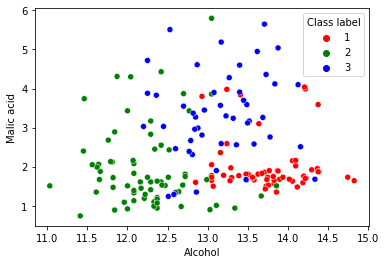

In [5]:
#Scatter plots for 'Alcohol' and 'Malic acid', colored feature 'Class label'
color_dict={1:'red', 2:'green', 3:'blue'}
sns.scatterplot(df1['Alcohol'], df1['Malic acid'], hue=df1['Class label'], palette=color_dict)

### MinMaxScaler

In [6]:
#recommended(train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1.drop('Class label', axis=1), df1['Class label'], test_size=0.3, random_state=0)
#shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 2), (54, 2), (124,), (54,))

In [7]:
#Normalization(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#by-default standardization converts dataframe into array
X_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [10]:
#so we need to convert back array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
#first 5 rows of X_train_scaled
X_train_scaled.head()

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [12]:
#first 5 rows of X_test_scaled
X_test_scaled.head()

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [13]:
#scatistical info before scaling
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [14]:
#scatistical info after scaling
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


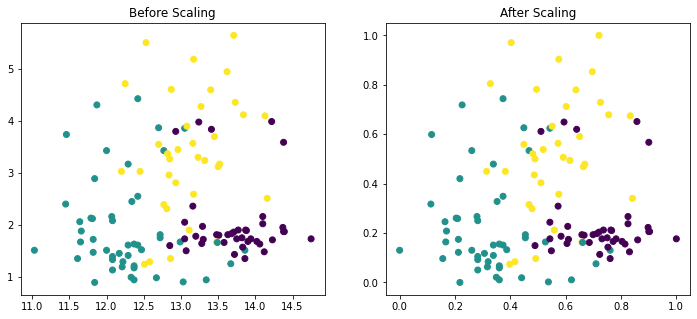

In [15]:
#Scatter plots for Alcohol, Malic acid colored by Class label, before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")

plt.show()
#c=color
#observation: just range of data is changed(taken into [0,1]), distribution looks all same(most of times), but its not necessary, it depends on data

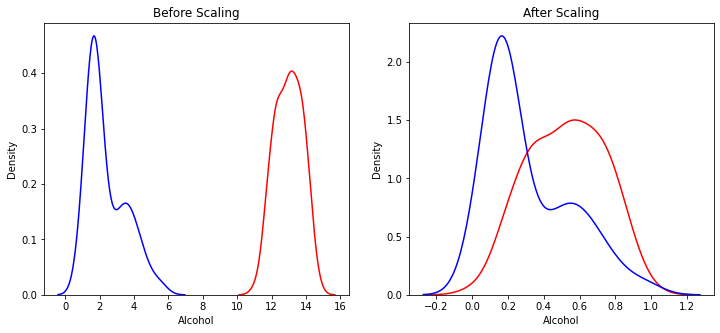

In [16]:
#Combined kernel Density Estimator(kde) plots for Alcohol, Malic acid colored by Class label, before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Alcohol'], ax=ax1, color='red')
sns.kdeplot(X_train['Malic acid'], ax=ax1, color='blue')
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, color='red')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, color='blue')
ax2.set_title("After Scaling")

plt.show()
#observation : before scaling both features have different ranges, but after scaling both ae taken to same range

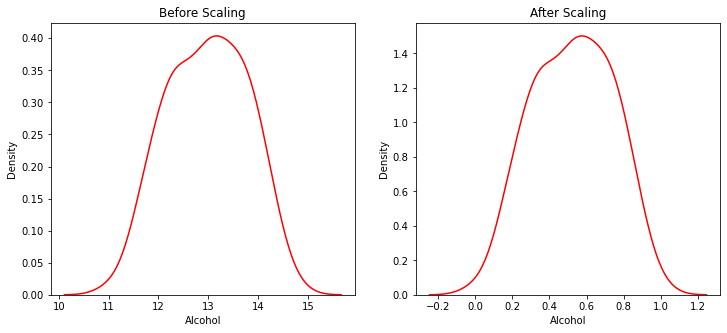

In [17]:
#Kernal Density Estimator graphs(kdeplot) for 'Alcohol' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Alcohol'], ax=ax1, color='red')
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, color='red')
ax2.set_title("After Scaling")

plt.show()
#observation : before and after scaling shapes looks same(most of times), but its not necessary, it depends on data

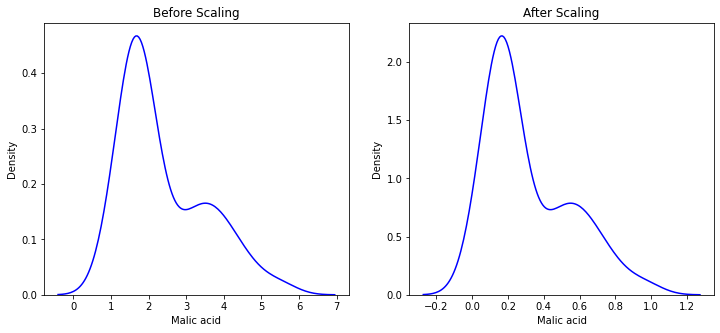

In [18]:
#Kernal Density Estimator graphs(kdeplot) for 'Malic acid' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Malic acid'], ax=ax1, color='blue')
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, color='blue')
ax2.set_title("After Scaling")

plt.show()
#observation : before and after scaling shapes looks same(most of times), but its not necessary, it depends on data

### Effect of Normalization on Outliers
Since, we sqeeze range as a result impact of outlier also squeezes, we need to handle outliers separetely.

### Normalization Vs Standardization
1. Depends on type of data
2. Most of the problems are solved by using Standardization
3. Normalization(MinMaxScaler) is mostly used when we already know min and max values, example : CNN(image processing)
4. when have outliers use Robust scaling
5. when have sparse data try with MaxAbs scaling
6. when have no idea simply use Standardization

**These are just tips, but not necessary that data will work best with these only, afterall feature engineering is all about exploration. So, we may try to apply all and check which one works best for your given data. And doing this we will learn more about data and scaling.**

**Note : Before applying scaling, first ask if scaling is really required? It depends on the algorithm we are going to apply, as some algorithms works good with scaling while others have no effect on them.**

**END of Documentation.**